# Simulated data
Simple codes to simulate data with
 1. Two true breakpoints
 2. No true breakpoints
 3. One true breakpoint
 
 You can vary the noise level and the slopes to play around.

## (1) Two true breakpoints

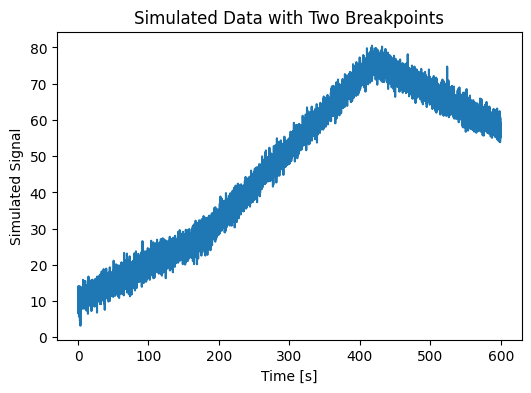

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters: Adjust as needed
total_time = 600  # Total duration in seconds
num_samples = 10000  # Total number of samples
breakpoint_times = [180, 420]  # Breakpoint times
slope1 = 0.1  # Slope of the first segment
slope2 = 0.2  # Slope of the second segment
slope3 = -0.1  # Slope of the third segment
bias = 10  # Initial value
noise_std = 2  # Standard deviation of noise

time = np.linspace(0, total_time, num_samples)

segment1_mask = time < breakpoint_times[0]
segment2_mask = (time >= breakpoint_times[0]) & (time < breakpoint_times[1])
segment3_mask = time >= breakpoint_times[1]

segment1 = bias + slope1 * time[segment1_mask]
segment2 = segment1[-1] + slope2 * (time[segment2_mask] - breakpoint_times[0])
segment3 = segment2[-1] + slope3 * (time[segment3_mask] - breakpoint_times[1])

signal = np.concatenate([segment1, segment2, segment3]) + np.random.normal(0, noise_std, num_samples)

simulated_data = pd.DataFrame({
    "Time (s)": time,
    "Signal": signal,
})

simulated_filename = "../data/simulated_data_true_breakpoints.csv"
simulated_data.to_csv(simulated_filename, index=False)

plt.figure(figsize=(6, 4))
plt.plot(simulated_data['Time (s)'], simulated_data['Signal'])
plt.xlabel('Time [s]')
plt.ylabel('Simulated Signal')
plt.title('Simulated Data with Two Breakpoints')
plt.show()


## (2) Just noise

Text(0.5, 1.0, 'Simulated signal with no true breakpoints')

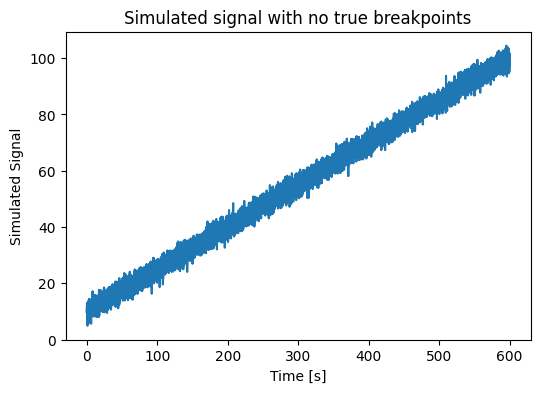

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters: Adjust as needed
total_time = 600  # Total duration in seconds
num_samples = 10000  # Total number of samples
breakpoint_times = [180, 420]  # Breakpoint times
slope1 = 0.15  # Slope of the first segment
slope2 = 0.15  # Slope of the second segment
slope3 = 0.15  # Slope of the third segment
bias = 10  # Initial value
noise_std = 2  # Standard deviation of noise

time = np.linspace(0, total_time, num_samples)

segment1_mask = time < breakpoint_times[0]
segment2_mask = (time >= breakpoint_times[0]) & (time < breakpoint_times[1])
segment3_mask = time >= breakpoint_times[1]

segment1 = bias + slope1 * time[segment1_mask]
segment2 = segment1[-1] + slope2 * (time[segment2_mask] - breakpoint_times[0])
segment3 = segment2[-1] + slope3 * (time[segment3_mask] - breakpoint_times[1])

signal = np.concatenate([segment1, segment2, segment3]) + np.random.normal(0, noise_std, num_samples)

simulated_data = pd.DataFrame({
    "Time (s)": time,
    "Signal": signal,    
})

simulated_filename = "../data/simulated_data_no_breakpoints.csv"
simulated_data.to_csv(simulated_filename, index=False)

plt.figure(figsize=(6, 4))
plt.plot(simulated_data['Time (s)'], simulated_data['Signal'])
plt.xlabel('Time [s]')
plt.ylabel('Simulated Signal')
plt.title('Simulated signal with no true breakpoints')


# (3) One true breakpoint

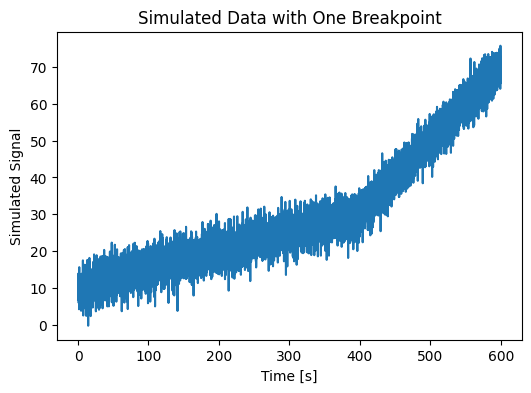

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters: Adjust as needed
total_time = 600  # Total duration in seconds
num_samples = 10000  # Total number of samples
breakpoint_time = 400  # Breakpoint times
bias = 10  # Initial value
noise_std = 3  # Standard deviation of noise
slope1 = 0.05  # Slope of the first segment
slope2 = 0.2  # Slope of the second segment

time = np.linspace(0, total_time, num_samples)

segment1_mask = time < breakpoint_time
segment2_mask = ~segment1_mask


segment1 = bias + slope1 * time[segment1_mask]
segment2 = segment1[-1] + slope2 * (time[segment2_mask] - breakpoint_time)

signal = np.concatenate([segment1, segment2]) + np.random.normal(0, noise_std, num_samples)

simulated_data = pd.DataFrame({
    "Time (s)": time,
    "Signal": signal,
})

simulated_filename = "../data/simulated_data_one_true_breakpoint.csv"
simulated_data.to_csv(simulated_filename, index=False)

plt.figure(figsize=(6, 4))
plt.plot(simulated_data['Time (s)'], simulated_data['Signal'])
plt.xlabel('Time [s]')
plt.ylabel('Simulated Signal')
plt.title('Simulated Data with One Breakpoint')
plt.show()
